In [1]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv("hotel_bookings.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


# Pre-processing data

In [3]:
df.shape

(36275, 19)

In [4]:
df.isna().sum()

Booking_ID                                 0
no_of_adults                             413
no_of_children                           324
no_of_weekend_nights                     367
no_of_week_nights                        807
type_of_meal_plan                        526
required_car_parking_space              2592
room_type_reserved                      1171
lead_time                                472
arrival_year                             378
arrival_month                            504
arrival_date                             981
market_segment_type                     1512
repeated_guest                           586
no_of_previous_cancellations             497
no_of_previous_bookings_not_canceled     550
avg_price_per_room                       460
no_of_special_requests                   789
booking_status                             0
dtype: int64

In [5]:
import numpy as np
numeric_data = df.select_dtypes(include=[np.number])
categoric_data = df.select_dtypes(exclude=[np.number])

In [6]:
numeric_data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,35862.000000,35951.000000,35908.000000,35468.00000,33683.000000,35803.000000,35897.000000,35771.000000,35294.000000,35689.000000,35778.000000,35725.000000,35815.000000,35486.000000
mean,1.845017,0.105366,0.810209,2.20331,0.030698,85.276569,2017.820431,7.424031,15.605712,0.025666,0.023646,0.154458,103.418207,0.619343
std,0.518652,0.402871,0.870857,1.40989,0.172501,85.998845,0.383834,3.068277,8.743484,0.158140,0.370835,1.764805,35.057342,0.785849
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.00000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.00000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.00000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.00000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
numeric_data = numeric_data.fillna(numeric_data.median())
numeric_data.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
required_car_parking_space              0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

In [8]:
numeric_data = numeric_data.apply(np.int64)
numeric_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,57,2018,8,16,0,0,0,99,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94,0


In [9]:
categoric_data.describe()

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,35749,35104,34763,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27421,27234,22264,24390


In [10]:
categoric_data = categoric_data.apply(lambda x: x.fillna(x.value_counts().index[0]))
categoric_data.isna().sum()

Booking_ID             0
type_of_meal_plan      0
room_type_reserved     0
market_segment_type    0
booking_status         0
dtype: int64

In [11]:
new_df = pd.concat([categoric_data , numeric_data] ,axis=1, join='inner')
new_df

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled,2,0,1,2,0,57,2018,8,16,0,0,0,99,0
1,INN00002,Not Selected,Room_Type 1,Online,Not_Canceled,2,0,2,3,0,5,2018,11,6,0,0,0,106,1
2,INN00003,Meal Plan 1,Room_Type 1,Online,Canceled,1,0,2,1,0,1,2018,2,28,0,0,0,60,0
3,INN00004,Meal Plan 1,Room_Type 1,Online,Canceled,2,0,0,2,0,211,2018,5,20,0,0,0,100,0
4,INN00005,Not Selected,Room_Type 1,Online,Canceled,2,0,1,1,0,48,2018,4,11,0,0,0,94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,Meal Plan 1,Room_Type 1,Online,Not_Canceled,3,0,2,2,0,85,2018,8,3,0,0,0,167,1
36271,INN36272,Meal Plan 1,Room_Type 1,Online,Canceled,2,0,1,3,0,228,2018,10,17,0,0,0,90,2
36272,INN36273,Meal Plan 1,Room_Type 1,Online,Not_Canceled,2,0,2,6,0,148,2018,7,1,0,0,0,98,2
36273,INN36274,Not Selected,Room_Type 1,Online,Canceled,2,0,0,3,0,63,2018,4,21,0,0,0,94,0


In [12]:
z = new_df['booking_status'].count()

In [13]:
new_df['arrival_month']

0         8
1        11
2         2
3         5
4         4
         ..
36270     8
36271    10
36272     7
36273     4
36274    12
Name: arrival_month, Length: 36275, dtype: int64

In [14]:
new_df['arrival_month'].value_counts()

10    5238
9     4550
8     4265
6     3162
12    2977
11    2937
7     2887
4     2700
5     2563
3     2328
2     1668
1     1000
Name: arrival_month, dtype: int64

<AxesSubplot:xlabel='arrival_month', ylabel='count'>

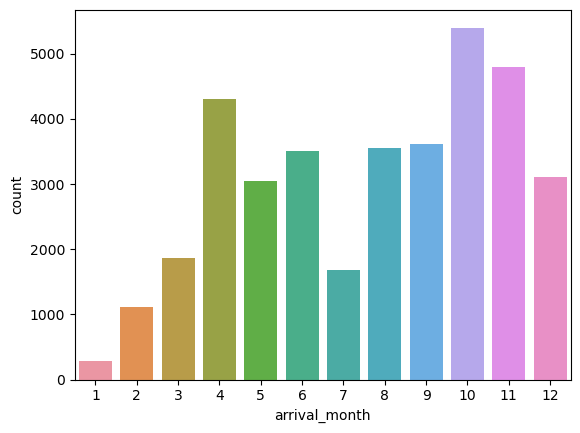

In [15]:
sns.countplot(x=new_df['lead_time'],data = new_df['arrival_month'])

cols = ['arrival_year', 'arrival_month', 'arrival_date']
new_df['date'] = new_df[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
new_df

new_df.drop(columns=['arrival_year','arrival_month','arrival_date'],inplace=True)

In [16]:
new_df['family'] = new_df['no_of_adults'] + new_df['no_of_children']
new_df.drop(columns=['no_of_adults','no_of_children'],inplace=True)

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

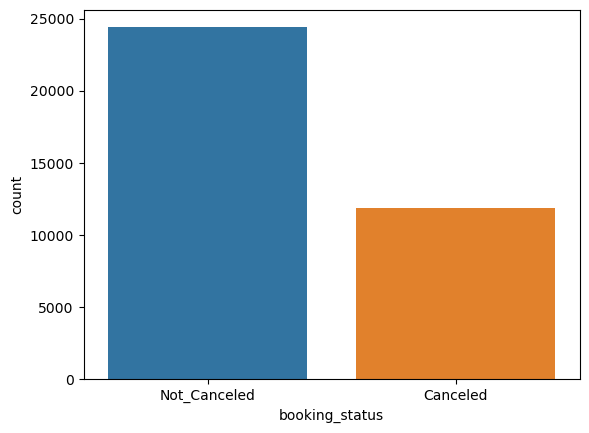

In [17]:
import seaborn as sns
sns.countplot(x=new_df['booking_status'])
new_df['booking_status'].value_counts()

<AxesSubplot:>

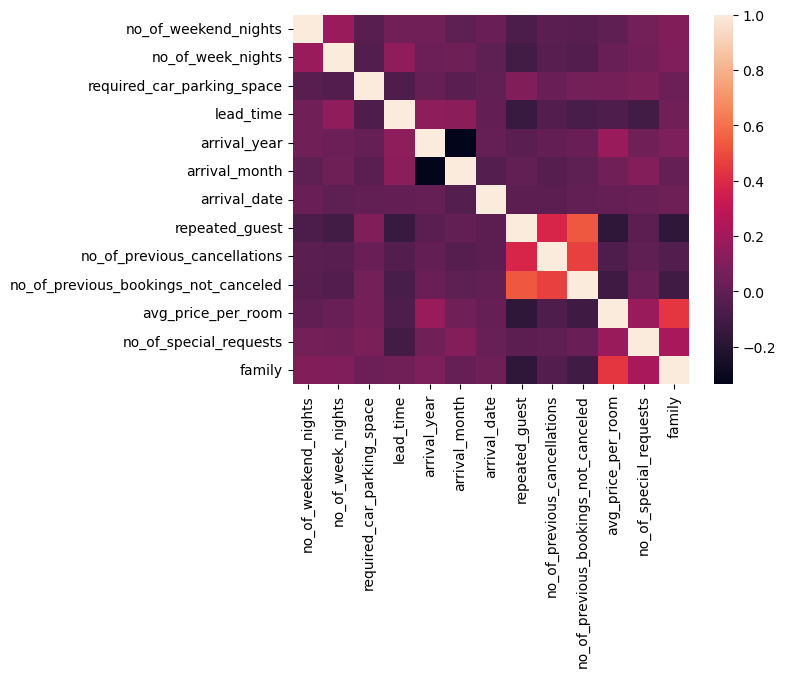

In [18]:
sns.heatmap(new_df.corr())

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_df['booking_status'] = le.fit_transform(new_df['booking_status'])
new_df['type_of_meal_plan'] = le.fit_transform(new_df['type_of_meal_plan'])
new_df['room_type_reserved'] = le.fit_transform(new_df['room_type_reserved'])
new_df['market_segment_type'] = le.fit_transform(new_df['market_segment_type'])

In [20]:
x = new_df.drop(columns=['booking_status','Booking_ID'])
y = new_df['booking_status']

# Training data

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=20,test_size=.2)

# Training model

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred = lr.predict(x_test)
y_pred_df = pd.DataFrame(y_pred)
# predicting the model

# Evaluating model

In [24]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score*100

77.40868366643694

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
cm

array([[1289,  498],
       [1141, 4327]], dtype=int64)

y_test
 1    4825
0    2430
Name: booking_status, dtype: int64

1 - not cancelled 
0 - cancelled 


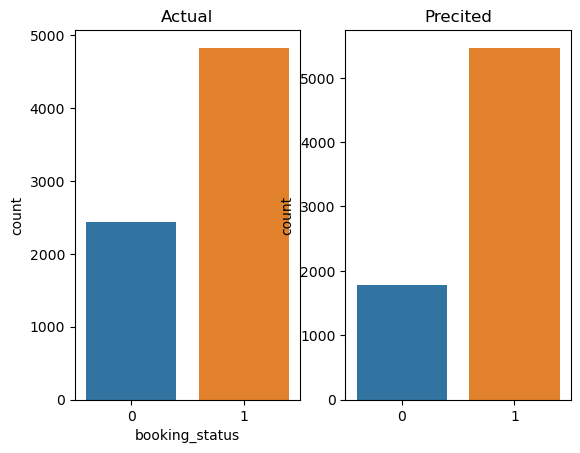

In [26]:
import matplotlib.pyplot as plt
plt.subplot(121)
sns.countplot(y_test)
plt.title("Actual")
print("y_test""\n",y_test.value_counts())
plt.subplot(122)
sns.countplot(y_pred)
plt.title("Precited")
print("\n""1 - not cancelled ""\n""0 - cancelled ")

In [28]:
booking_cancel = new_df[new_df['booking_status']==0].value_counts()
booking_done = new_df[new_df['booking_status']==1].value_counts()

Text(0.5, 1.0, '2018')

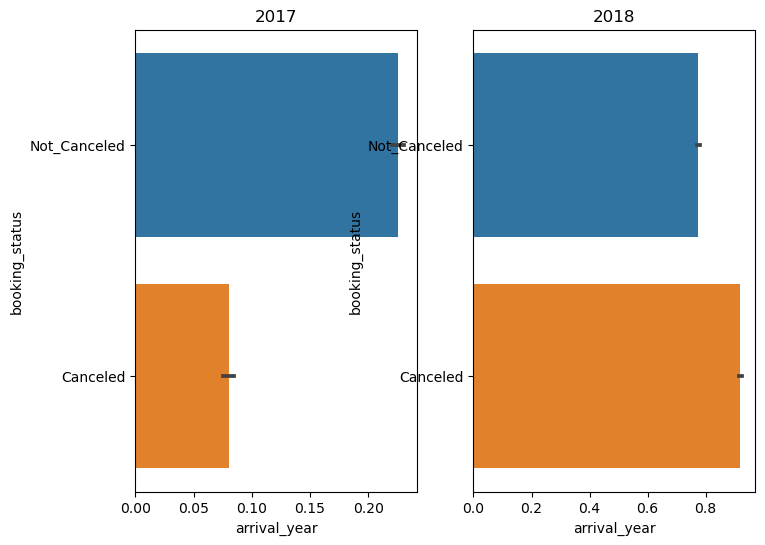

In [33]:
new_df['booking_status'].value_counts()
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.barplot(x=new_df['arrival_year']==2017,y=df['booking_status'])
plt.title("2017")
plt.subplot(122)
sns.barplot(x=new_df['arrival_year']==2018,y=df['booking_status'])
plt.title("2018")

<AxesSubplot:xlabel='type_of_meal_plan', ylabel='count'>

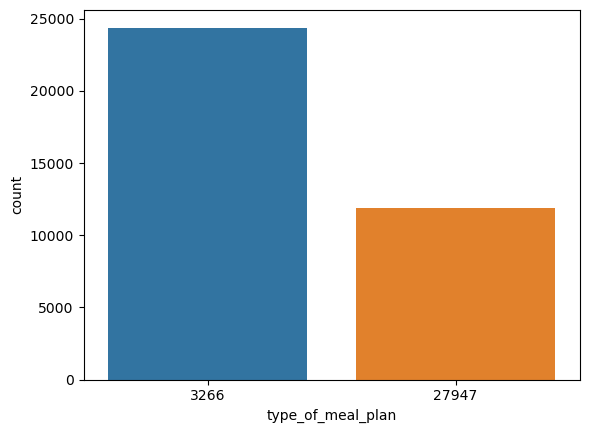

In [30]:
meal = new_df['type_of_meal_plan'].value_counts()
sns.countplot(data = meal , x=new_df['booking_status'])

In [31]:
meal_0 = new_df[(new_df['type_of_meal_plan']==0)&(new_df['booking_status']==1 & 0)]
meal_0

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,family
2,INN00003,0,0,4,0,2,1,0,1,2018,2,28,0,0,0,60,0,1
3,INN00004,0,0,4,0,0,2,0,211,2018,5,20,0,0,0,100,0,2
13,INN00014,0,0,4,0,2,0,0,95,2018,11,20,0,0,0,90,2,1
18,INN00019,0,0,4,0,2,2,0,99,2017,10,30,0,0,0,65,0,2
20,INN00021,0,0,4,0,2,2,0,99,2017,10,30,0,0,0,65,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36264,INN36265,0,3,4,0,0,2,0,187,2018,7,8,0,0,0,105,0,2
36266,INN36267,0,1,4,0,2,2,0,8,2018,3,4,0,0,0,85,1,2
36268,INN36269,0,0,3,0,0,3,0,166,2018,11,1,0,0,0,110,0,1
36269,INN36270,0,5,4,0,0,1,0,0,2018,10,6,0,0,0,216,0,4
